In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
bank=pd.read_csv("bankloan.csv")

In [3]:
bank.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
bank.tail()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
bank.isnull()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
bank.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

# Logistic Regression

[[-8.19771579e-05 -5.16180461e-01  5.22054073e-01  5.35939174e-02
   9.42956431e-01  3.19669069e-02  1.36354991e+00  6.09425067e-04
   2.47882792e-02  3.78882359e-01 -1.22084457e-01 -2.71569577e-02]]
[-0.07756166]
Accuracy_score: 0.9406666666666667


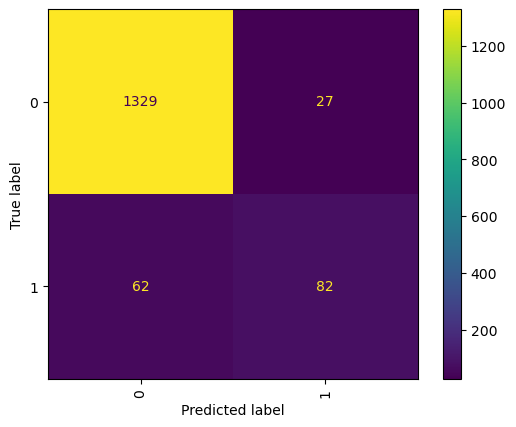

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1356
           1       0.75      0.57      0.65       144

    accuracy                           0.94      1500
   macro avg       0.85      0.77      0.81      1500
weighted avg       0.94      0.94      0.94      1500



In [12]:
x=bank.drop(['ZIP.Code','Personal.Loan'],axis=1)
y=bank['Personal.Loan']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify=y,random_state=23)

lr = LogisticRegression()
lr.fit(x_train, y_train)
print(lr.coef_)
print(lr.intercept_)

y_pred = lr.predict(x_test)
print("Accuracy_score:",accuracy_score(y_test, y_pred))  

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=y_test.unique())
disp.plot()
plt.xticks(rotation=90)
plt.show()

print(classification_report(y_test,y_pred))

# Logistic Regression

In [15]:
# Tunning Using Logistic
lr = LogisticRegression()
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params = {'penalty':['l1','l2','elasticnet',None],'l1_ratio':np.linspace(0,1,5),
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

gcv = GridSearchCV(lr,param_grid=params,cv=kfold)
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'l1_ratio': 0.75, 'penalty': 'l1', 'solver': 'liblinear'}
0.9512


# KNN

In [26]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_train)
y_pred_prob=knn.predict_proba(x_train)
print("Accuracy_score:",accuracy_score(y_train, y_pred))

Accuracy_score: 0.9328571428571428


# KNN Using Tunning Parameter

In [28]:
kfold = KFold(n_splits=5, shuffle=True, random_state=23)
params = {'n_neighbors' : [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]}
gcv = GridSearchCV(knn_reg, param_grid=params,cv =kfold)
gcv.fit(x,y)
y_pred=knn.predict(x_train)
y_pred_prob=knn.predict_proba(x_train)
print("Accuracy_score:",accuracy_score(y_train, y_pred))

Accuracy_score: 0.9328571428571428


# Decision Tree

In [30]:
dtc=DecisionTreeClassifier(random_state=23,max_depth=2)#max_depth is tunning parameter
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_train)
y_pred_prob=dtc.predict_proba(x_train)
print("Accuracy_score:",accuracy_score(y_train, y_pred))

Accuracy_score: 0.968


# Decision Tree Using Tunning Parameter

In [34]:
skfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=23)
params={'max_depth':[3,4,5,6,7,None],'min_samples_leaf':[2,5,10,20,80,100]}
dtc=DecisionTreeClassifier(random_state=23)
gcv=GridSearchCV(dtc,param_grid=params,cv=skfold,scoring='neg_log_loss')
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)
print("Accuracy_score:",accuracy_score(y_train, y_pred))

{'max_depth': 3, 'min_samples_leaf': 2}
-0.04455823103871522
Accuracy_score: 0.968


# SVM

In [ ]:
svm=SVC()
